## **Câu hỏi 4**

### **Nhập các thư viện và dữ liệu cần thiết**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Nhập dữ liệu đã được xử lý trước đó

In [2]:
data_1999_2022 = pd.read_csv('./DATA/infant_mortality_data_1999_2022_cleaned.csv')
data_2017_2022 = pd.read_csv('./DATA/infant_mortality_data_2017_2022_cleaned.csv')

### **Đặt câu hỏi về dữ liệu**

#### **Câu hỏi:** Chỉ số BMI trong giai đoạn trước khi mang thai của người mẹ liên quan như thế nào tới cân nặng và các nguyên nhân tử vong của trẻ sơ sinh?

**Lợi ích sau khi trả lời được câu hỏi trên:** Sau khi trả lời được câu hỏi này ta sẽ có cái nhìn tổng quát về tình trạng sức khỏe của người mẹ trong giai đoạn tiền mang thai ảnh hưởng như thế nào cân nặng và nguyên nhân tử vong của trẻ sơ sinh.

In [3]:
bmi_mapping = {
    'Underweight <18.5': 0,
    'Normal 18.5-24.9': 1,
    'Overweight 25.0-29.9': 2,
    'Obesity I 30.0-34.9': 3,
    'Obesity II 35.0-39.9': 4,
    'Extreme Obesity III > 39.9': 5,
    'Unknown or Not Stated': -1
}

reversed_bmi_mapping = {v: k for k, v in bmi_mapping.items()}

data_2017_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cause of death              1443 non-null   object 
 1   NICU Admission              1443 non-null   int64  
 2   Antibiotics for Mother      1443 non-null   int64  
 3   Mother's Pre-pregnancy BMI  1443 non-null   int64  
 4   Infant birth weight         1443 non-null   float64
 5   Deaths                      1443 non-null   int64  
 6   Births                      1443 non-null   int64  
 7   Death rate per 1000         1443 non-null   float64
 8   Year                        1443 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 101.6+ KB


### **Phân tích sự liên quan chỉ số BMI của người mẹ trong giai đoạn tiền mang thai đối với cân nặng của trẻ sơ sinh.**

Đầu tiên để hiểu được tác động của chỉ số BMI của người mẹ trong giai đoạn tiền mang thai, ta sẽ xem sự phân bố của các thuộc tính nguyên nhân gây chết ở trẻ sơ sinh và cân nặng của trẻ sơ sinh như thế đối với các mức độ BMI của người mẹ.

Ta tính cân nặng trung bình của trẻ sơ sinh cho mỗi mức chỉ số BMI

In [4]:
bmi_weight_mean = data_2017_2022.groupby('Mother\'s Pre-pregnancy BMI')['Infant birth weight'].mean().reset_index()
bmi_weight_mean['BMI'] = bmi_weight_mean['Mother\'s Pre-pregnancy BMI'].map(reversed_bmi_mapping)
bmi_weight_mean.drop('Mother\'s Pre-pregnancy BMI', axis=1, inplace=True)
bmi_weight_mean

,Infant birth weight,BMI
0,564.717391,Unknown or Not Stated
1,1640.804348,Underweight <18.5
2,1661.948347,Normal 18.5-24.9
3,1602.153631,Overweight 25.0-29.9
4,1538.870079,Obesity I 30.0-34.9
5,1701.802632,Obesity II 35.0-39.9
6,1795.134921,Extreme Obesity III > 39.9


Ta loại đi giá trị 'Unknown or Not Stated' vì không có giá trị trong phân tích. 

In [5]:
bmi_weight_mean = bmi_weight_mean[bmi_weight_mean['BMI'] != 'Unknown or Not Stated']

tiến hành trực quan hóa

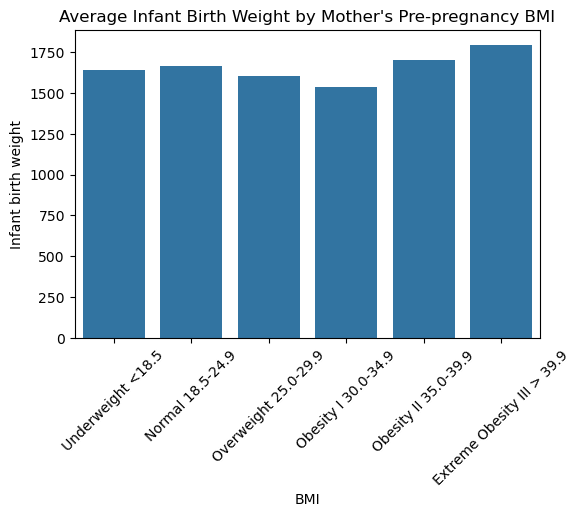

In [6]:
plt.figure(figsize=(6, 4))
sns.barplot(data=bmi_weight_mean, y='Infant birth weight', x='BMI')
plt.title('Average Infant Birth Weight by Mother\'s Pre-pregnancy BMI')
plt.xticks(rotation=45)
plt.show()

**Nhận xét:**  
- Cân nặng trung bình thấp nhất xuất hiện ở nhóm béo phì độ I (BMI 30.0-34.9), khoảng 1500 gram. Từ điểm này, có sự gia tăng đều đặn về cân nặng khi BMI tăng qua các mức độ béo phì cao hơn, đạt đỉnh ở mức béo phì cực độ III với khoảng 1750 gram.

- Nhóm những người mẹ thiếu cân (BMI < 18.5) lại có xu hướng sinh con có cân nặng cao hơn so với các bà mẹ thuộc nhóm béo phì độ I (BMI 30.0-34.9) điều này cho thấy mức độ béo phì của người mẹ có thể ảnh hưởng đến cân nặng của con.

Ta cùng xem tiếp đến sự biến đổi chỉ số BMI của người mẹ trong giai đoạn tiền mang thai qua các năm từ 2017 đến 2022 và so sánh với cân nặng trung bình của trẻ sơ sinh trong cùng khoảng thời gian.

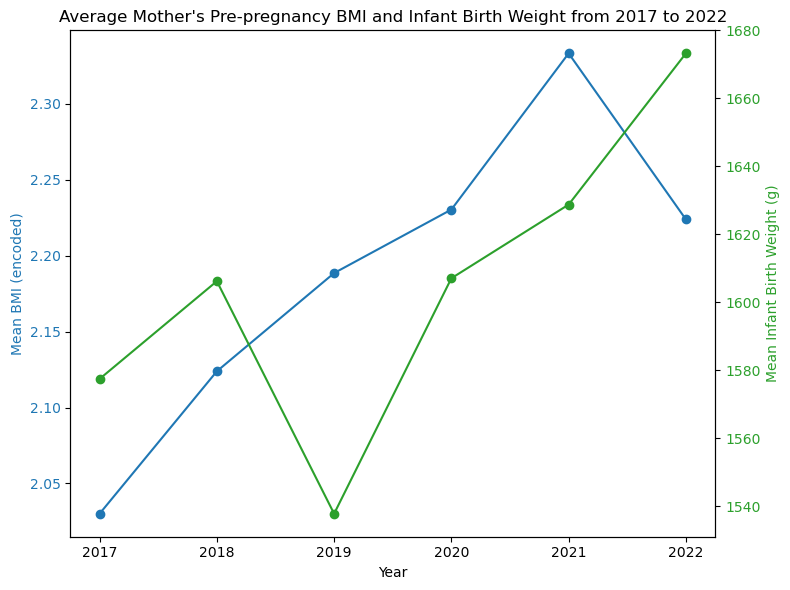

In [7]:
# Calculate mean BMI and mean infant birth weight per year
mean_bmi_per_year = data_2017_2022.groupby('Year')['Mother\'s Pre-pregnancy BMI'].mean().reset_index()
mean_birth_weight_per_year = data_2017_2022.groupby('Year')['Infant birth weight'].mean().reset_index()

# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Mean BMI
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean BMI (encoded)', color='tab:blue')
ax1.plot(mean_bmi_per_year['Year'], mean_bmi_per_year['Mother\'s Pre-pregnancy BMI'], marker='o', color='tab:blue', label='Mean BMI')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis to plot Mean Infant Birth Weight
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Infant Birth Weight (g)', color='tab:green')
ax2.plot(mean_birth_weight_per_year['Year'], mean_birth_weight_per_year['Infant birth weight'], marker='o', color='tab:green', label='Mean Infant Birth Weight')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add a title and show the plot
plt.title('Average Mother\'s Pre-pregnancy BMI and Infant Birth Weight from 2017 to 2022')
fig.tight_layout()
plt.show()

**Nhận xét**:

- Nhìn chung cả chỉ số đều có xu hướng tăng mạnh.  

- Sự tăng ở chỉ số BMI trung bình cho thấy sự chuyển dịch theo xu hướng xấu khi mà theo thời gian tỉ lệ phụ nữ thừa cân béo, phì trong giai đoạn trước khi mang thai ngày càng nhiều, điều này có thể làm tăng nguy cơ mắc các vấn đề như tiểu đường thai kỳ hoặc huyết áp. Tuy nhiên chỉ số này mặc dù tăng nhưng vẫn nằm trong khoảng thừa cân (BMI 25-29.9) và béo phì độ I (BMI 30-34.9) thậm chí còn có giảm nhẹ trong giai đoạn 2021-2022.

- Cân nặng trung bình của trẻ sơ sinh tăng mạnh xấp xỉ 1kg trong khoảng thời gian 5 năm này.

- Cả BMI và cân nặng trung bình của trẻ đều tăng, cho thấy có thể có mối liên hệ tích cực giữa chỉ số BMI của mẹ và cân nặng của trẻ sơ sinh trong giai đoạn này.


Cân nặng của trẻ sơ sinh còn liên quan mật thiết đến việc đánh giá trẻ có sinh non hay không, thông thường trẻ sinh non là trẻ được sinh trước 37 tuần thai hoặc có cân nặng dưới 2,5 kg.  

Dựa vào đặc điểm này ta tiếp tục phân tích mối quan hệ giữa chỉ số BMI của người mẹ trong giai đoạn tiền mang thai với tỉ lệ trẻ sinh non.

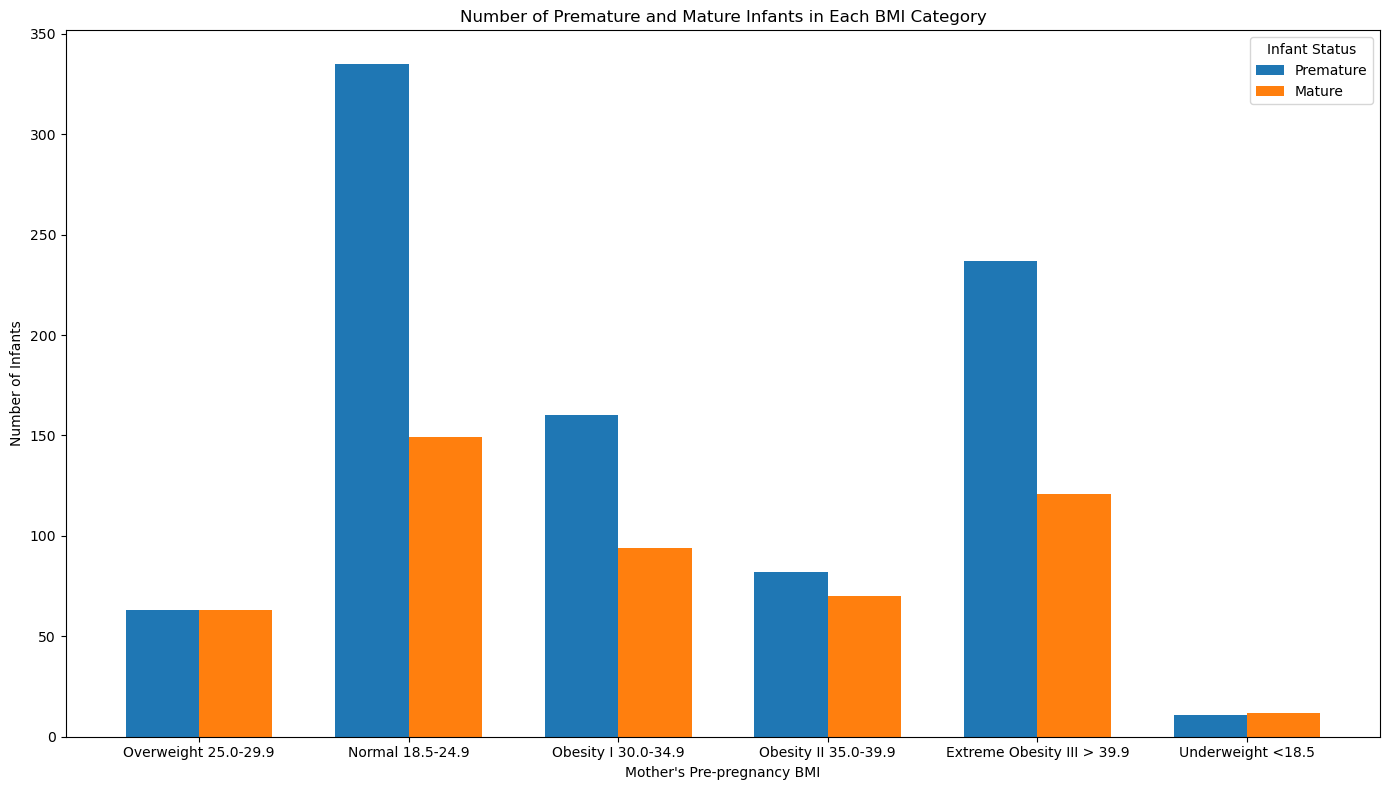

In [8]:
bmi_condition = data_2017_2022[['Mother\'s Pre-pregnancy BMI', 'Infant birth weight']].copy()
bmi_condition['BMI'] = bmi_condition['Mother\'s Pre-pregnancy BMI'].map(reversed_bmi_mapping)
bmi_condition.drop('Mother\'s Pre-pregnancy BMI', axis=1, inplace=True)
bmi_condition = bmi_condition[bmi_condition['BMI'] != 'Unknown or Not Stated']

# Create a new column to classify infants as premature or mature
bmi_condition['Infant Status'] = bmi_condition['Infant birth weight'].apply(lambda x: 'Premature' if x < 2500 else 'Mature')

# Group by 'Mother's Pre-pregnancy BMI' and 'Infant Status', then count the number of infants
grouped = bmi_condition.groupby(['BMI', 'Infant Status']).size().reset_index(name='Count')

# Create the plot
plt.figure(figsize=(14, 8))
bar_width = 0.35

# Get unique BMI categories and create x positions
bmi_categories = bmi_condition['BMI'].unique()
x = np.arange(len(bmi_categories))

# Create separate bars for Premature and Mature
for i, status in enumerate(['Premature', 'Mature']):
    data = grouped[grouped['Infant Status'] == status]
    plt.bar(x + (i * bar_width), data['Count'], width=bar_width, label=status)

# Customize plot
plt.title('Number of Premature and Mature Infants in Each BMI Category')
plt.xlabel('Mother\'s Pre-pregnancy BMI')
plt.ylabel('Number of Infants')
plt.xticks(x + bar_width/2, bmi_categories)
plt.legend(title='Infant Status')
plt.tight_layout()
plt.show()

- Ta có thể thấy nhóm các người mẹ có chỉ số BMI bình thường, béo phì độ I (BMI 30-34.9) và nhóm béo phì cực độ (BMI > 39.9) chiếm phần lớn số lượng trẻ sinh non đồng thời số lượng trẻ sinh non ở ba nhóm này gần như gấp đôi số lượng số trẻ sinh đủ tháng. 
- Các nhóm còn lại tỉ lệ trẻ sinh non và trẻ sinh đủ tháng không có sự khác biệt rõ rệt.
- Việc trẻ sơ sinh được thống kê ở nhóm các người mẹ có chỉ số BMI bình thường chiếm số lượng khá lớn là do dữ liệu được thu thập nhiều nhóm này không liên quan đến việc người mẹ có chỉ số BMI bình thường sẽ có tỉ lệ trẻ sinh non chiếm đa số.

**Nhận xét**

- **BMI bình thường (18.5–24.9):**
    - Nhóm này có **số lượng trẻ sinh non và đủ tháng cao nhất**.
    - Số trẻ sinh non vượt trội so với trẻ sinh đủ tháng, cho thấy nguy cơ sinh non vẫn hiện hữu ngay cả ở nhóm BMI "bình thường".

- **Thừa cân (25.0–29.9):**
    - Số trẻ sinh non và đủ tháng khá cân bằng, với sự chênh lệch nhỏ.
    - Điều này có thể cho thấy kết quả sinh đẻ ổn định ở nhóm mẹ có BMI thuộc ngưỡng thừa cân.

- **Các nhóm béo phì (BMI >30.0):**
    - **Béo phì độ I (30.0–34.9):** Số trẻ sinh non cao hơn so với trẻ sinh đủ tháng, cho thấy nguy cơ gia tăng các ca sinh non ở nhóm này.
    - **Béo phì cực độ III (>39.9):** Nhóm này có sự **chênh lệch lớn giữa số trẻ sinh non và sinh đủ tháng**, với trẻ sinh non chiếm đa số. Điều này phù hợp với nghiên cứu y khoa, khi BMI cao thường làm tăng nguy cơ biến chứng, dẫn đến sinh non.

- **Dưới cân (<18.5):**
    - Số lượng trẻ (cả sinh non và đủ tháng) ở nhóm này rất ít, có thể phản ánh số lượng bà mẹ thuộc nhóm BMI dưới cân nhỏ.
    - Số trẻ sinh non và đủ tháng khá cân bằng, nhưng kích thước mẫu thấp giới hạn khả năng đưa ra kết luận rộng hơn.

**Ý nghĩa**

- **Nguy cơ ở từng nhóm BMI:**
    - Biểu đồ nhấn mạnh nguy cơ ở cả nhóm dưới cân và nhóm béo phì cực độ, phù hợp với các biến chứng y khoa như sinh non hoặc trẻ nhẹ cân.

- **Quan sát ở nhóm BMI bình thường:**
    - Mặc dù được phân loại là "bình thường", nhóm này vẫn có tỷ lệ trẻ sinh non đáng kể, cho thấy có thể có những yếu tố khác (ví dụ: sức khỏe của mẹ, chăm sóc thai kỳ) ảnh hưởng đến kết quả sinh đẻ.

- **Xu hướng trong nhóm béo phì:**
    - Khi BMI tăng, tỷ lệ trẻ sinh non so với trẻ đủ tháng cũng tăng, nhấn mạnh tầm quan trọng của việc kiểm soát cân nặng của mẹ để cải thiện kết quả mang thai.

### **Phân tích sự liên quan chỉ số BMI của người mẹ trong giai đoạn tiền mang thai đối với các nguyên nhân gây ra tử vong ở trẻ sơ sinh**

Ta tiến hành xem xét sự phân bổ của các nguyên nhân gây tử vong cho trẻ sơ sinh qua các năm

Text(0.5, 58.7222222222222, 'Year')

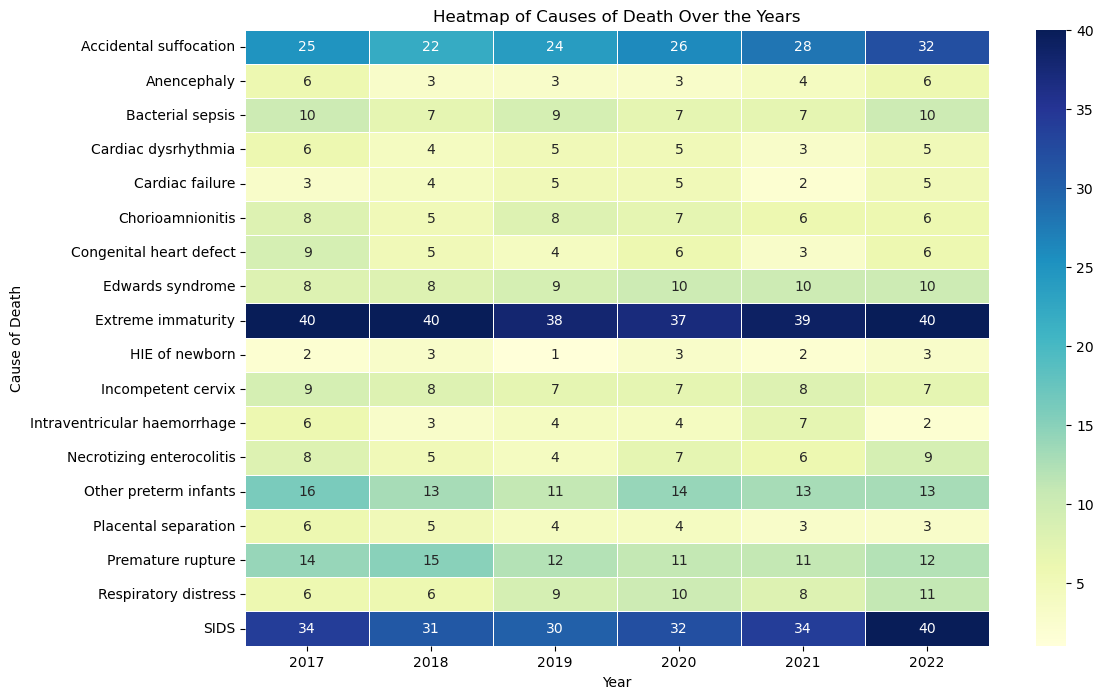

In [9]:
# Clean and filter data
grouped = data_2017_2022.groupby(['Year', 'Cause of death']).size().reset_index(name='Count')
grouped = grouped[~grouped['Cause of death'].isin(['Unspecified causes', 'Other causes'])]

# Pivot the data to create a DataFrame suitable for plotting
pivot_df = grouped.pivot(columns='Year', index='Cause of death', values='Count').fillna(0)

# Plot the data using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

# Customize the plot
plt.title('Heatmap of Causes of Death Over the Years')
plt.ylabel('Cause of Death')
plt.xlabel('Year')

Số lượng trẻ sơ sinh tử vong qua các năm

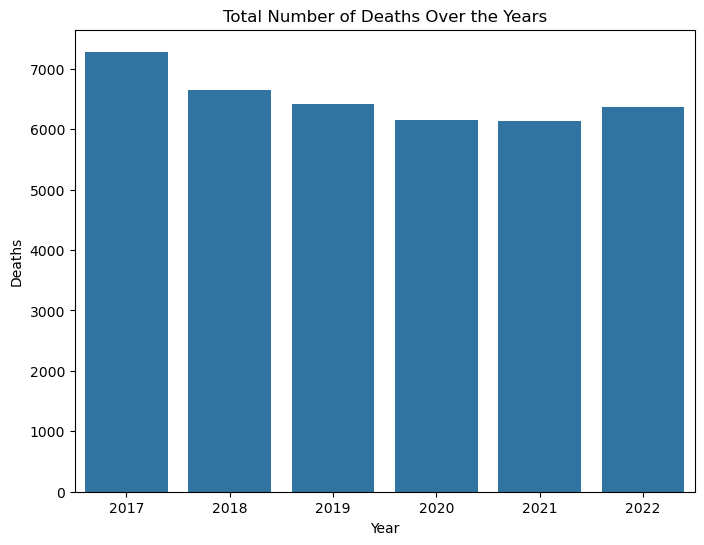

In [10]:
death_year = data_2017_2022.groupby('Year')['Deaths'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=death_year, x='Year', y='Deaths')
plt.title('Total Number of Deaths Over the Years')
plt.show()

**Nhận xét:**
- Số lượng tử vong hằng năm tương đối ổn định từ năm 2017 đến năm 2022, không có sự gia tăng hay giảm mạnh về tổng số trường hợp tử vong. Điều này cho thấy hệ thống chăm sóc sức khỏe trẻ sơ sinh có thể đang giữ được sự cân bằng, nhưng cũng gợi ý rằng các cải thiện để giảm tỷ lệ tử vong chưa được thể hiện rõ rệt.

- Biểu đồ cho thấy có một loạt các nguyên nhân gây tử vong, từ các yếu tố như **Accidental suffocation** (Ngạt thở do tai nạn) đến các vấn đề liên quan đến nhiễm trùng hoặc dị tật bẩm sinh như **Congenital heart defect** (Dị tật tim bẩm sinh). Điều này cho thấy tính phức tạp của các yếu tố nguy cơ trong tử vong trẻ sơ sinh.

- Thông qua biểu đồ trên ta thấy sự phân bổ rõ ràng của các tác nhân gây tử vong cho trẻ sơ sinh, trong đó có 3 tác nhân lớn chính có tỉ lệ dường như không đổi qua các năm là trẻ sinh vô cùng non (**Extreme immaturity**), trẻ bị đột tử (**SIDS - Sudden infant death syndrome**) và trẻ bị ngạt thở (**Accidental suffocation**)



Tiếp theo ta xem xét sự phân bổ của các nguyên nhân gây tử vong ở trẻ sơ sinh trong từng loại chỉ số BMI của người mẹ trước khi mang thai

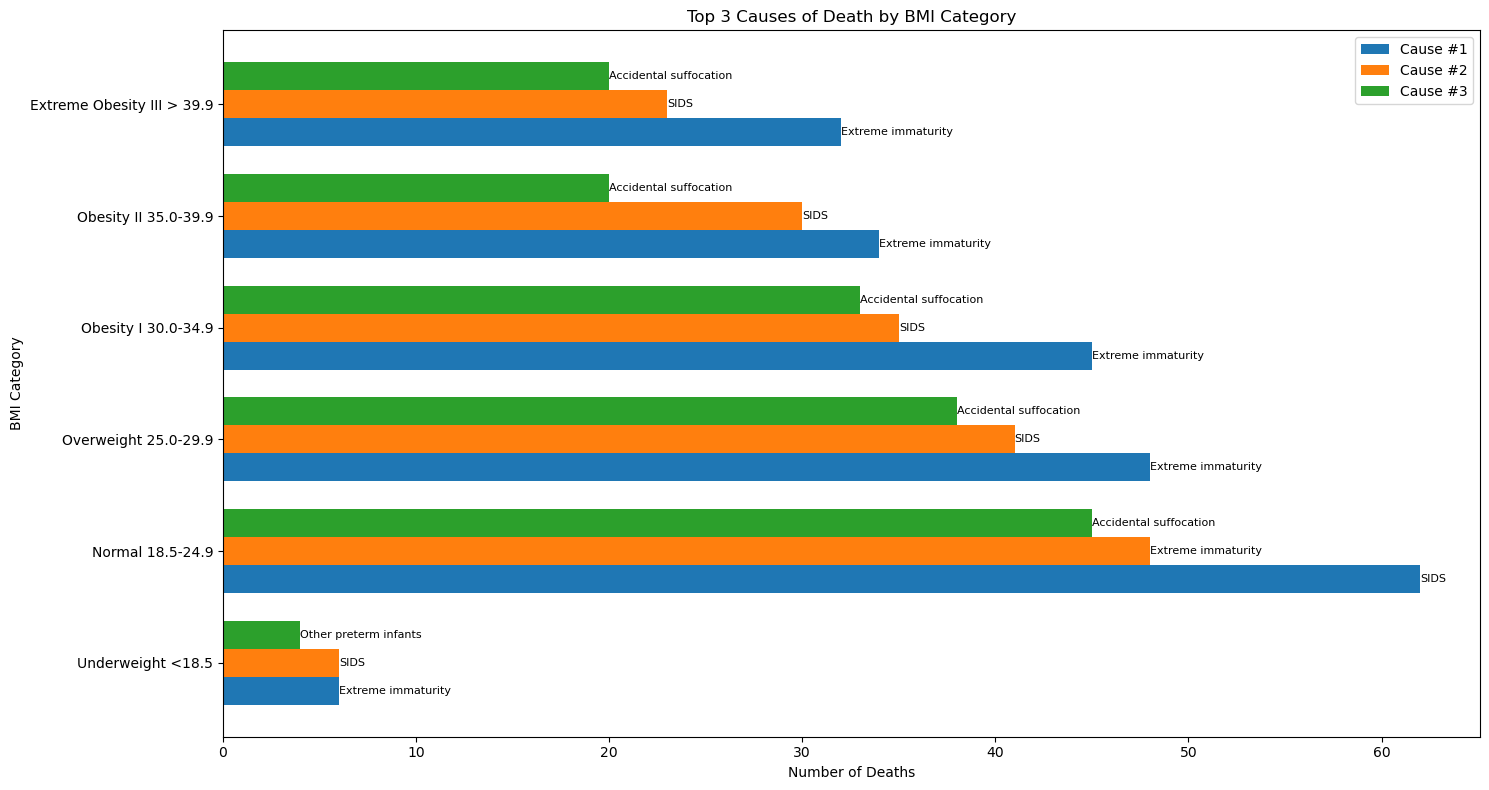

In [11]:
grouped = data_2017_2022.groupby(['Mother\'s Pre-pregnancy BMI', 'Cause of death']).size().reset_index(name='Count')
grouped = grouped[grouped['Mother\'s Pre-pregnancy BMI'] != -1]
grouped = grouped[~grouped['Cause of death'].isin(['Unspecified causes', 'Other causes'])]

# Sort the grouped data by 'Mother's Pre-pregnancy BMI' and 'Count' in descending order
sorted_grouped = grouped.sort_values(['Mother\'s Pre-pregnancy BMI', 'Count'], ascending=[True, False])
sorted_grouped['BMI'] = sorted_grouped['Mother\'s Pre-pregnancy BMI'].map(reversed_bmi_mapping)
sorted_grouped.drop('Mother\'s Pre-pregnancy BMI', axis=1, inplace=True)

# Get the top 3 causes of death for each BMI category
top_3_deaths_per_bmi = sorted_grouped.groupby('BMI').head(3)

plt.figure(figsize=(15, 8))

# Get unique BMI categories
bmi_categories = sorted_grouped['BMI'].unique()

# Set up positions for bars
y = np.arange(len(bmi_categories))
height = 0.25

# Plot bars for each cause (1st, 2nd, 3rd)
for i, rank in enumerate(range(3)):
   data = sorted_grouped.groupby('BMI').nth(rank)
   plt.barh(y + (i * height), data['Count'], height, 
           label=f'Cause #{rank+1}')
   
   # Add cause of death labels inside or next to bars
   for j, cause in enumerate(data['Cause of death']):
       plt.text(data['Count'].iloc[j], y[j] + (i * height), 
               cause, rotation=0, ha='left', va='center',
               fontsize=8)

plt.title('Top 3 Causes of Death by BMI Category')
plt.ylabel('BMI Category')
plt.xlabel('Number of Deaths')
plt.yticks(y + height, bmi_categories)
plt.legend()
plt.tight_layout()
plt.show()

Mối liên hệ giữa BMI và các nguyên nhân tử vong ở trẻ sơ sinh cho thấy những hiểu biết quan trọng về sức khỏe bà mẹ và trẻ sơ sinh:

- Đối với nhóm BMI bình thường (18.5-24.9):  
Tỷ lệ SIDS cao nhất ở nhóm này có thể được giải thích bởi việc các yếu tố rủi ro khác đã được giảm thiểu. Khi BMI bình thường, các biến chứng liên quan đến cân nặng ít xảy ra hơn, khiến SIDS nổi lên như nguyên nhân tử vong chính. Điều này phù hợp với hiểu biết rằng SIDS là hội chứng phức tạp, không đơn thuần liên quan đến chỉ số BMI của mẹ.

- Đối với các nhóm BMI cao (từ 25 trở lên):  
Extreme immaturity (sinh non cực kỳ sớm) là nguyên nhân tử vong hàng đầu, phản ánh cơ chế sinh lý bệnh quan trọng. Béo phì trong thai kỳ làm tăng nồng độ cytokine tiền viêm và stress oxy hóa, có thể kích hoạt cơ chế sinh non. Thêm vào đó, tình trạng kháng insulin và rối loạn nội tiết ở người mẹ béo phì có thể ảnh hưởng đến sự phát triển của nhau thai và tăng nguy cơ sinh non.

- Đối với nhóm thiếu cân (BMI <18.5):  
Extreme immaturity cũng là nguyên nhân hàng đầu, nhưng qua cơ chế khác. Thiếu cân thường đi kèm với thiếu hụt dinh dưỡng vi lượng thiết yếu như acid folic, sắt và kẽm - những yếu tố quan trọng cho sự phát triển thai nhi và duy trì thai kỳ. Tình trạng này có thể dẫn đến sự phát triển bất thường của nhau thai và tăng nguy cơ sinh non.

- Điểm đáng chú ý về accidental suffocation:  
Tỷ lệ này tăng dần theo BMI, có thể liên quan đến việc trẻ sinh ra từ mẹ có BMI cao thường có cân nặng lớn hơn và có thể gặp khó khăn trong việc kiểm soát đường thở trong những tháng đầu đời.

Những phát hiện này nhấn mạnh tầm quan trọng của việc duy trì BMI khỏe mạnh trước và trong thai kỳ, đồng thời gợi ý nhu cầu về các chiến lược can thiệp khác nhau cho từng nhóm BMI để giảm thiểu rủi ro tử vong ở trẻ sơ sinh.